In [1]:
from __future__ import division, print_function
from sys import platform as _platform
import matplotlib

if _platform == "linux" or _platform == "linux2":
    matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pylab as plt
import os
import sys
import numpy as np
import random
import copy
import traceback
import operator
from collections import defaultdict
from pprint import pprint
import string
from graph_tool.all import *
import scipy.stats as stats
from IPython.display import HTML
import pandas as pd
import sys
import os
lib_path = '/home/fgeigl/'
print('append', lib_path)
sys.path.append(lib_path)
import tools.mpl_tools as plt_tools
# import seaborn
matplotlib.rcParams.update({'font.size': 25})
matplotlib.rcParams['xtick.major.pad'] *= 2
matplotlib.rcParams['ytick.major.pad'] *= 2
from matplotlib.colors import ColorConverter

color_conv = ColorConverter()

append /home/fgeigl/


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
def matrix_to_latex(mat, decimals=2):
    print(r'\begin{pmatrix}')
    try:    
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                if j != 0:
                    print(' & ', end='')
                print(np.round(mat[i,j], decimals=decimals), end='')
            if i != mat.shape[0] - 1:
                print(r' \\')
            else:
                print('')
    except:
        for i in range(mat.shape[0]):
            print(np.round(mat[i], decimals=decimals), end='')
            if i != mat.shape[0] - 1:
                print(r' \\')
            else:
                print('')
    print(r'\end{pmatrix}')
    
def trans_mat(mat):
    # print('get trans mat of\n', mat)
    out = np.array(mat.sum(axis=0)).flatten()
    # print('Matrix outdegree\n', out)

    D = np.diag(out)
    # print('D\n', D)

    # print(np.power(D,-1))
    D_norm = np.power(D, -1)
    D_norm[np.invert(np.isfinite(D_norm))] = 0

    return mat.dot(D_norm)
    

<bound method PropertyMap.get_2d_array of <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f8ff88294d0, at 0x7f8ff8869d10>>


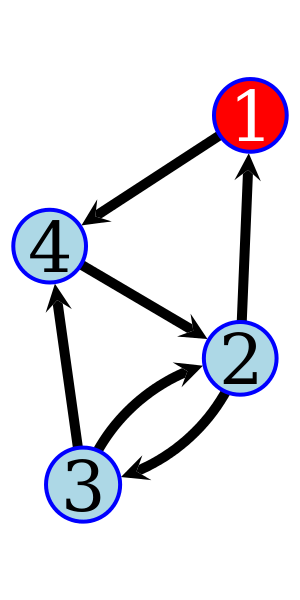

0

In [19]:
g = Graph(directed=True)
vertices = g.add_vertex(4)
g.add_edge(1, 0)
g.add_edge(0, 3)
g.add_edge(2, 3)
# g.add_edge(3, 0)
g.add_edge(3, 1)
g.add_edge(1, 2)
g.add_edge(2, 1)
target_nodes = [0]

label_names = g.new_vertex_property('string')
v_colors = g.new_vertex_property('vector<float>')
for v in g.vertices():
    label_names[v] = str(int(v) +1)
    if int(v) in target_nodes:
        c_name = 'red'
    else:
        c_name = 'lightblue'
    v_colors[v] = color_conv.to_rgba(c_name)

def_e_color = [0., 0., 0., 1]
def_e_width = 10
edge_color = g.new_edge_property('vector<float>')
edge_width = g.new_edge_property('float')
for e in g.edges():
    edge_color[e] = def_e_color
    edge_width[e] = def_e_width

pos = g.new_vertex_property('vector<float>')
out_size = (300, 600)
pos.set_2d_array(np.array(np.matrix([[0,-1],[-1,0],[1,0],[0,1]])).T)

#pin = g.new_vertex_property('bool')
#pin.a[0] = 1
#pin.a[2] = 1
print(pos.get_2d_array)
pos = sfdp_layout(g, C=4, pos=pos)
plot_ext = '_dir'
out_fn = 'toy_graph' + plot_ext + '.pdf'
graph_draw(g, vertex_text=label_names, vertex_font_size= 70, edge_color=edge_color, edge_pen_width=edge_width, vertex_pen_width=4, vertex_color='blue', vertex_fill_color=v_colors, pos=pos, output=out_fn, output_size=out_size)
os.system('pdfcrop ' + out_fn + ' ' + out_fn)


# defaults

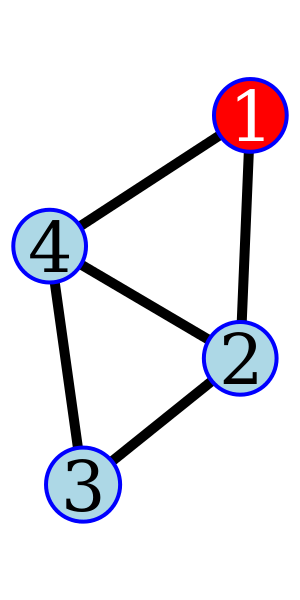

0

In [27]:
if True:
    g.set_directed(False)
    remove_parallel_edges(g)
    plot_ext = '_undir'
out_fn = 'toy_graph' + plot_ext + '.pdf'
graph_draw(g, vertex_text=label_names, vertex_font_size= 70, edge_color=edge_color, edge_pen_width=edge_width, vertex_pen_width=4, vertex_color='blue', vertex_fill_color=v_colors, pos=pos, output=out_fn, output_size=out_size)
os.system('pdfcrop ' + out_fn + ' ' + out_fn)

In [28]:
A = adjacency(g).todense()
print('A\n', A)

t = np.zeros(A.shape[0])
t[target_nodes] = 1
print('t\n', t)

A_out = np.array(A.sum(axis=0)).flatten()
print('A outdegree\n', A_out)

D = np.diag(A_out)
print('D\n', D)

# print(np.power(D,-1))
D_norm = np.power(D, -1)
D_norm[np.invert(np.isfinite(D_norm))] = 0

P = A.dot(D_norm)
print('P\n', P)
def get_stat_dist(P):
    w, v = np.linalg.eig(P)
    w = w.real
    v = v.real
    max_eig = np.argmax(w)
    print('max eig:', w[max_eig])
    pi = np.array(v[:, max_eig]).flatten()
    pi /= pi.sum()
    print('pi\n', pi, '\npi sum', pi.sum())
    print('pi = P * pi:', np.allclose(pi, np.array(P.dot(pi)).flatten()))
    return pi
pi = get_stat_dist(P)
matrix_to_latex(pi)

A
 [[ 0.  1.  0.  1.]
 [ 1.  0.  1.  1.]
 [ 0.  1.  0.  1.]
 [ 1.  1.  1.  0.]]
t
 [ 1.  0.  0.  0.]
A outdegree
 [ 2.  3.  2.  3.]
D
 [[ 2.  0.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  0.  2.  0.]
 [ 0.  0.  0.  3.]]
P
 [[ 0.          0.33333333  0.          0.33333333]
 [ 0.5         0.          0.5         0.33333333]
 [ 0.          0.33333333  0.          0.33333333]
 [ 0.5         0.33333333  0.5         0.        ]]
max eig: 1.0
pi
 [ 0.2  0.3  0.2  0.3] 
pi sum 1.0
pi = P * pi: True
\begin{pmatrix}
0.2 \\
0.3 \\
0.2 \\
0.3
\end{pmatrix}


# bias

N
 [[ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
W_B
 [[ 0.  2.  0.  2.]
 [ 1.  0.  1.  1.]
 [ 0.  1.  0.  1.]
 [ 1.  1.  1.  0.]]


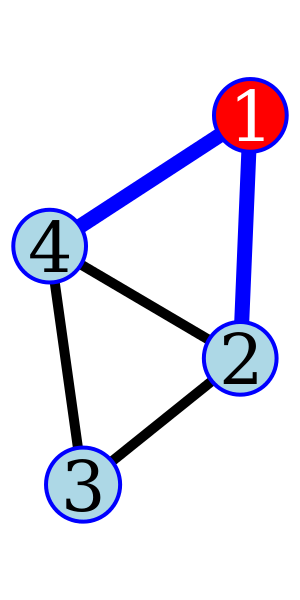

In [29]:
N = np.diag(t)
print('N\n', N)

W_B = A + N.dot(A)
print('W_B\n', W_B)

for e in g.edges():
    if int(e.target()) in target_nodes or (not g.is_directed() and int(e.source()) in target_nodes):
        edge_width[e] *= 1.5
        edge_color[e] = color_conv.to_rgba('blue')

out_fn = 'toy_graph_b' + plot_ext + '.pdf'
graph_draw(g, vertex_text=label_names, vertex_font_size= 70, edge_color=edge_color, edge_pen_width=edge_width, vertex_pen_width=4, vertex_color='blue', vertex_fill_color=v_colors, pos=pos, output=out_fn, output_size=out_size)
os.system('pdfcrop ' + out_fn + ' ' + out_fn)

for e in g.edges():
    if int(e.target()) in target_nodes:
        edge_color[e] = def_e_color
        edge_width[e] = def_e_width


In [30]:
matrix_to_latex(A.astype('int'))

\begin{pmatrix}
0 & 1 & 0 & 1 \\
1 & 0 & 1 & 1 \\
0 & 1 & 0 & 1 \\
1 & 1 & 1 & 0
\end{pmatrix}


In [31]:
matrix_to_latex(t.astype('int'))

\begin{pmatrix}
1 \\
0 \\
0 \\
0
\end{pmatrix}


In [32]:
matrix_to_latex(D.astype('int'))
matrix_to_latex(P)

\begin{pmatrix}
2 & 0 & 0 & 0 \\
0 & 3 & 0 & 0 \\
0 & 0 & 2 & 0 \\
0 & 0 & 0 & 3
\end{pmatrix}
\begin{pmatrix}
0.0 & 0.33 & 0.0 & 0.33 \\
0.5 & 0.0 & 0.5 & 0.33 \\
0.0 & 0.33 & 0.0 & 0.33 \\
0.5 & 0.33 & 0.5 & 0.0
\end{pmatrix}


In [33]:
matrix_to_latex(N.astype('int'))
matrix_to_latex(W_B.astype('int'))
matrix_to_latex(trans_mat(W_B))
matrix_to_latex(get_stat_dist(trans_mat(W_B)))

\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix}
\begin{pmatrix}
0 & 2 & 0 & 2 \\
1 & 0 & 1 & 1 \\
0 & 1 & 0 & 1 \\
1 & 1 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
0.0 & 0.5 & 0.0 & 0.5 \\
0.5 & 0.0 & 0.5 & 0.25 \\
0.0 & 0.25 & 0.0 & 0.25 \\
0.5 & 0.25 & 0.5 & 0.0
\end{pmatrix}
max eig: 1.0
pi
 [ 0.28571429  0.28571429  0.14285714  0.28571429] 
pi sum 1.0
pi = P * pi: True
\begin{pmatrix}
0.29 \\
0.29 \\
0.14 \\
0.29
\end{pmatrix}
